In [12]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems
import h5py
import tables
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils
import nilmtk

train = DataSet('Smart/smartstar.h5') # 读取数据集

In [3]:
train_elec = train.buildings[1].elec
train_elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='SMART', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='SMART', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='SMART', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=4, building=1, dataset='SMART', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=5, building=1, dataset='SMART', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='SMART', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='SMART', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=8, building=1, dataset='SMART', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='SMART', appliances=[Appliance(type='light', instance=2)])
  ElecMeter(instance=10, building=1, dataset='SMART', a

In [4]:
fridge = nilmtk.global_meter_group.select_using_appliances(type='fridge')
nilmtk.global_meter_group.select_using_appliances(type='fridge')   #查看数据集下所有电器数据

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='SMART', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=15, building=2, dataset='SMART', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=24, building=2, dataset='SMART', appliances=[Appliance(type='fridge', instance=2)])
  ElecMeter(instance=7, building=3, dataset='SMART', appliances=[Appliance(type='fridge', instance=1)])
)

Loading data for meter ElecMeterID(instance=15, building=2, dataset='SMART')     

d:\nilmtk\nilmtk\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")


Loading data for meter ElecMeterID(instance=7, building=3, dataset='SMART')      
Done loading data all meters for this chunk.
2013-12-31 19:00:00-05:00    0.228961
2013-12-31 19:30:00-05:00    0.432705
2013-12-31 20:00:00-05:00    0.129808
2013-12-31 20:30:00-05:00    0.298324
2013-12-31 21:00:00-05:00    0.070662
Freq: 1800S, Name: (power, active), dtype: float32
Calculating total_energy for ElecMeterID(instance=7, building=3, dataset='SMART') ...    active    4.959571
dtype: float64


d:\nilmtk\nilmtk\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
d:\nilmtk\nilmtk\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
d:\nilmtk\nilmtk\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")


AxesSubplot(0.125,0.2;0.775x0.68)


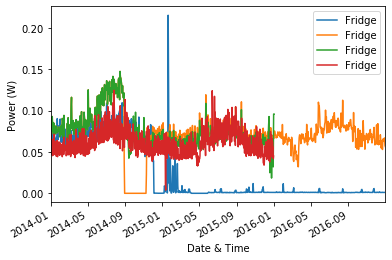

In [5]:
print(fridge.power_series_all_data().head())#全部屋子的fridge总数据
print(fridge.total_energy()) #fridge总功耗
print(fridge.plot()) #全部屋子的fridge功率图

In [8]:
elec = train.buildings[1].elec
fridge_data = next(elec['fridge'].load())
elec_data = next(elec.load())
print(type(elec))
print(type(elec_data))
print(elec_data)
print(elec_data.index.values)

date = elec_data.index.values

Loading data for meter ElecMeterID(instance=20, building=1, dataset='SMART')     
Done loading data all meters for this chunk.
<class 'nilmtk.metergroup.MeterGroup'>
<class 'pandas.core.frame.DataFrame'>
physical_quantity             power
type                         active
2013-12-31 19:00:00-05:00  0.795101
2013-12-31 19:30:00-05:00  0.716727
2013-12-31 20:00:00-05:00  0.667612
2013-12-31 20:30:00-05:00  0.767058
2013-12-31 21:00:00-05:00  0.568542
...                             ...
2016-12-31 16:30:00-05:00  0.285912
2016-12-31 17:00:00-05:00  0.156306
2016-12-31 17:30:00-05:00  0.251503
2016-12-31 18:00:00-05:00  0.178353
2016-12-31 18:30:00-05:00  0.214933

[52608 rows x 1 columns]
['2014-01-01T00:00:00.000000000' '2014-01-01T00:30:00.000000000'
 '2014-01-01T01:00:00.000000000' ... '2016-12-31T22:30:00.000000000'
 '2016-12-31T23:00:00.000000000' '2016-12-31T23:30:00.000000000']


In [9]:
elec_data

physical_quantity,power
type,active
2013-12-31 19:00:00-05:00,0.795101
2013-12-31 19:30:00-05:00,0.716727
2013-12-31 20:00:00-05:00,0.667612
2013-12-31 20:30:00-05:00,0.767058
2013-12-31 21:00:00-05:00,0.568542
...,...
2016-12-31 16:30:00-05:00,0.285912
2016-12-31 17:00:00-05:00,0.156306
2016-12-31 17:30:00-05:00,0.251503
